In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 

In [39]:
columns = [
    "geonameid", "name", "asciiname", "alternatenames", 
    "latitude", "longitude", "feature_class", "feature_code", 
    "country_code", "cc2", "admin1_code", "admin2_code", 
    "admin3_code", "admin4_code", "population", "elevation", 
    "dem", "timezone", "modification_date"
]
df = pd.read_csv("../data/PL.txt", sep="\t", header=None, names=columns)

In [40]:
df

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
0,462259,Zodenen,Zodenen,"Gospodskiy Dvor Zodenen,Sodehnen",54.38306,20.45639,P,PPLQ,PL,NaN,85.0,2801.0,280105.0,NaN,0,NaN,163,Europe/Warsaw,2015-09-05
1,477032,Variazhanka,Variazhanka,"Mlynski Potok,Młyński Potok,Varenzhanka,Varezh...",50.63333,24.16667,H,STM,PL,NaN,0.0,NaN,NaN,NaN,0,NaN,179,Europe/Warsaw,2021-08-04
2,490932,Sołokija,Solokija,"Fluss Solokija,Fluss Sołokija,Reka Solokiya,Ri...",50.38333,24.25000,H,STM,PL,NaN,0.0,NaN,NaN,NaN,0,NaN,182,Europe/Warsaw,2025-01-10
3,502656,Rata,Rata,"Rata,Рата",50.35148,24.24569,H,STM,PL,"PL,UA",0.0,NaN,NaN,NaN,0,NaN,189,Europe/Warsaw,2023-11-07
4,558461,Hrodzyenskaye Uzvyshsha,Hrodzyenskaye Uzvyshsha,"Grodnenskaya Vozvyshennost',Grodnenskaya Vozvy...",53.66514,23.54748,T,HLLS,PL,NaN,81.0,2011.0,201106.0,NaN,0,NaN,131,Europe/Warsaw,2010-09-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58520,13561844,Cmentarz,Cmentarz,NaN,52.20976,23.08323,S,CMTY,PL,NaN,75.0,601.0,60107.0,NaN,0,NaN,163,Europe/Warsaw,2025-12-28
58521,13561848,Szerzawy,Szerzawy,NaN,52.68411,17.91674,P,PPL,PL,NaN,73.0,409.0,40903.0,NaN,0,NaN,87,Europe/Warsaw,2025-12-28
58522,13561857,Łaziska,Laziska,NaN,52.73723,17.66550,P,PPL,PL,NaN,73.0,419.0,41905.0,NaN,0,NaN,109,Europe/Warsaw,2025-12-29
58523,13561923,Wiechowicze,Wiechowicze,NaN,52.20004,23.11767,P,PPL,PL,NaN,75.0,601.0,60107.0,NaN,0,NaN,154,Europe/Warsaw,2025-12-31


In [41]:
# 1. Check Feature Classes distribution
print("Distribution of Feature Classes:")
print(df['feature_class'].value_counts())

# 2. Analyze Class 'P' (Populated Places)
df_p = df[df['feature_class'] == 'P'].copy()
print(f"\nTotal Populated Places (Class P): {len(df_p)}")

print("Feature Codes in Class P:")
print(df_p['feature_code'].value_counts())

Distribution of Feature Classes:
feature_class
P    47900
S     3085
A     3002
H     2442
T     1580
V      377
L      109
R       29
U        1
Name: count, dtype: int64

Total Populated Places (Class P): 47900
Feature Codes in Class P:
feature_code
PPL      43788
PPLX      2256
PPLA3     1415
PPLA2      178
PPLQ       147
PPLH        67
PPLL        18
PPLA        16
PPLF         7
PPLS         3
PPLA4        2
PPLC         1
PPLR         1
PPLW         1
Name: count, dtype: int64


In [72]:
df = df[
    (df['feature_class'] == 'P') & 
    (df['population'] > 0) 
].copy()

print(f"Dataset Size: {len(df)}")
df[['name', 'population', 'feature_code', 'admin2_code']].sort_values('population', ascending=False).head(50)

Dataset Size: 5247


,name,population,feature_code,admin2_code
3193,Warsaw,1702139,PPLC,1465.0
38637,Kraków,804237,PPLA,1261.0
25290,Wrocław,672545,PPLA,264.0
36979,Łódź,645693,PPLA,1061.0
32049,Poznań,536151,PPLA,3064.0
43244,Gdańsk,487371,PPLA,2261.0
27735,Szczecin,395513,PPLA,3262.0
12876,Lublin,336339,PPLA,663.0
45804,Bydgoszcz,330038,PPLA,461.0
23010,Białystok,295683,PPLA,2061.0


In [ ]:
# 1. Get the Admin Codes for Warsaw 
warsaw = clean_df[clean_df['name'] == 'Warsaw'].iloc[0] # Or 'Warszawa' depending on data language
print(f"Warsaw Admin2 Code: {warsaw['admin2_code']}")

# 2. Find other 'Cities' that share this code
suspects = clean_df[
    (clean_df['admin2_code'] == warsaw['admin2_code']) & 
    (clean_df['geonameid'] != warsaw['geonameid']) &
    (clean_df['feature_class'] == 'P')
]

print(f"Suspects hiding inside Warsaw: {len(suspects)}")
print(suspects[['name', 'feature_code', 'population']])

Warsaw Admin2 Code: 1465.0
Suspects hiding inside Warsaw: 18
                 name feature_code  population
217          Żoliborz          PPL       50934
2392             Wola          PPL      140958
2537           Włochy          PPL       36276
2786          Wilanów          PPL       14032
3063           Wesoła          PPL       20000
3150            Wawer          PPL       77205
3376            Ursus          PPL       47285
4119         Targówek          PPL      124279
5515      Śródmieście          PPL       99950
7536        Rembertów          PPL       21893
10455          Ochota          PPL       82774
11489         Mokotów          PPL      217683
22970         Bielany          PPL      131910
23042       Białołeka          PPL      129106
23187          Bemowo          PPL      123932
48942         Ursynów          PPL      149775
48943    Praga Północ          PPL       93192
48944  Praga Południe          PPL      179836


In [51]:
# 1. Define Top Metropolises (e.g., Top 10 by population)
top_metros = clean_df.sort_values("population", ascending=False).head(10)

print(f"{'Metropolis':<15} | {'Admin2':<8} | {'Impostors Found (PPL/PPLX)'}")
print("-" * 60)

for idx, metro in top_metros.iterrows():
    metro_name = metro['name']
    metro_code = metro['admin2_code']
    metro_id = metro['geonameid']
    
    # 2. Find anything sharing this admin2_code that is NOT the city itself
    # We check the original 'df' to catch PPLX too, just to see what we are missing
    impostors = df[
        (df['admin2_code'] == metro_code) & 
        (df['geonameid'] != metro_id) &
        (df['feature_class'] == 'P')
    ]
    
    count = len(impostors)
    print(f"{metro_name:<15} | {int(metro_code):<8} | {count}")
    
    # look at the names for specific cities
    if count > 0:
        print(f"   -> Names: {impostors['name'].tolist()}")

Metropolis      | Admin2   | Impostors Found (PPL/PPLX)
------------------------------------------------------------
Warsaw          | 1465     | 219
   -> Names: ['Żwir', 'Żoliborz', 'Zielona', 'Zerzeń', 'Żerań', 'Zbytki', 'Zbarz', 'Zawady', 'Zastów', 'Zamość', 'Załuski', 'Zagóżdż', 'Zacisze', 'Wyczółki', 'Wólka Zerzeńska', 'Wólka Węglowa', 'Wolica', 'Wola Grzybowska', 'Wola', 'Włochy', 'Wiśniewo', 'Wilanów', 'Wiktoryn', 'Wierzbno', 'Wesoła', 'Wawrzyszew Stary', 'Wawrzyszew Nowy', 'Wawrzyszew', 'Wawer', 'Ursus', 'Tomaszów', 'Targówek', 'Tarchomin', 'Szczęśliwice', 'Szamocin', 'Świdry Stare', 'Świdry Nowe', 'Stare Bródno', 'Śródmieście', 'Służewiec', 'Służew', 'Skorosze', 'Siekierki', 'Saska Kępa', 'Różopole', 'Stary Rembertów', 'Nowy Rembertów', 'Rembertów Grzybowa', 'Rembertów', 'Rakowiec', 'Raków', 'Radość', 'Pyry Ludwinowo', 'Pyry', 'Praga', 'Powsinek', 'Powsin', 'Powiśle', 'Powązki', 'Podkaczy Dól', 'Płudy', 'Placówka', 'Paluch', 'Opacz Duża', 'Opacz', 'Olesin', 'Okęcie', 'Odolany

In [77]:
filt = (df['name'] == 'Warsaw') | (df['name'] == 'Warszawa')
df[filt]['alternatenames'].values

array(['Barsobia,Varsa,Varsava,Varsavia,Varsavja,Varsawa,Varshava,Varshavae,Varsja,Varsjá,Varso,Varsova,Varsovia,Varsovie,Varsovio,Varssavi,Varsuva,Varsòvia,Varsó,Varsóvia,Varşava,Varşova,Varšava,Varšuva,Varșovia,Vársá,WAW,Warsaw,Warsawa,Warschau,Warskou,Warszaw,Warszawa,Waršawa,baleusyaba,hua sha,varshava,vorso,warsw,warushawa,wrsh,wrshw,wrsw,wxrsx,Βαρσοβία,Варшавæ,Варшава,Վարշավա,Վարշաւա,ווארשע,ורשה,װאַרשע,وارسو,ورشو,ۋارشاۋا,ܘܪܣܘ,वॉर्सो,วอร์ซอ,ვარშავა,ዋርሶው,ワルシャワ,华沙,華沙,바르샤바'],
      dtype=object)

In [81]:
import pandas as pd

# 1. The Golden List (Polish Names)
MIASTA_NA_PRAWACH_POWIATU = [
    "Jelenia Góra", "Legnica", "Wałbrzych", "Wrocław", 
    "Bydgoszcz", "Grudziądz", "Toruń", "Włocławek", 
    "Biała Podlaska", "Chełm", "Lublin", "Zamość", 
    "Gorzów Wielkopolski", "Zielona Góra", 
    "Łódź", "Piotrków Trybunalski", "Skierniewice", 
    "Kraków", "Nowy Sącz", "Tarnów", 
    "Ostrołęka", "Płock", "Radom", "Siedlce", "Warszawa", 
    "Opole", "Krosno", "Przemyśl", "Rzeszów", "Tarnobrzeg", 
    "Białystok", "Łomża", "Suwałki", 
    "Gdańsk", "Gdynia", "Słupsk", "Sopot", 
    "Bielsko-Biała", "Bytom", "Chorzów", "Częstochowa", "Dąbrowa Górnicza", 
    "Gliwice", "Jastrzębie-Zdrój", "Jaworzno", "Katowice", "Mysłowice", 
    "Piekary Śląskie", "Ruda Śląska", "Rybnik", "Siemianowice Śląskie", 
    "Sosnowiec", "Świętochłowice", "Tychy", "Zabrze", "Żory", 
    "Kielce", "Elbląg", "Olsztyn", 
    "Kalisz", "Konin", "Leszno", "Poznań", 
    "Koszalin", "Szczecin", "Świnoujście"
]

# 2. Load Data (assuming loaded as 'df')
# We ensure 'alternatenames' is a string and handle NaNs
df['alternatenames'] = df['alternatenames'].fillna("")

print(f"{'Target City':<20} | {'Matched Name':<20} | {'Admin2':<8} | {'Pop':<8} | {'Feature_Code'} {'Status'}")
print("-" * 80)

protected_map = {} # {Admin2_Code : GeoNameID}

for city in MIASTA_NA_PRAWACH_POWIATU:
    # SEARCH LOGIC:
    # 1. Exact match on 'name' OR 'asciiname'
    # 2. OR 'alternatenames' contains the city string
    
    # We create a mask for filtering
    mask = (
        (df['name'] == city) | 
        (df['asciiname'] == city) | 
        (df['alternatenames'].str.contains(city, regex=False))
    ) & (df['feature_class'] == 'P')
    
    candidates = df[mask]
    
    if len(candidates) == 0:
        print(f"{city:<20} | {'NOT FOUND':<20} | {'---':<8} | {'---':<8} | ❌ ERROR")
        continue
        
    # POPULATION CHECK:
    # Sort candidates by population descending. The "Real" city will be #1.
    # This solves the "Chełm" problem (City vs Village).
    winner = candidates.sort_values('population', ascending=False).iloc[0]
    
    # Store the result
    protected_map[winner['admin2_code']] = winner['geonameid']
    
    print(f"{city:<20} | {winner['name']:<20} | {int(winner['admin2_code']):<8} | {winner['population']:<8} | {winner['feature_code']:<8} | ✅ OK")

print("-" * 80)
print(f"Shield Logic Complete. Identified {len(protected_map)} distinct admin zones to protect.")

Target City          | Matched Name         | Admin2   | Pop      | Feature_Code Status
--------------------------------------------------------------------------------
Jelenia Góra         | Jelenia Góra         | 261      | 77366    | PPL      | ✅ OK
Legnica              | Legnica              | 262      | 106033   | PPLA3    | ✅ OK
Wałbrzych            | Wałbrzych            | 265      | 127431   | PPLA3    | ✅ OK
Wrocław              | Wrocław              | 264      | 672545   | PPLA     | ✅ OK
Bydgoszcz            | Bydgoszcz            | 461      | 330038   | PPLA     | ✅ OK
Grudziądz            | Grudziądz            | 462      | 92552    | PPL      | ✅ OK
Toruń                | Toruń                | 463      | 196935   | PPL      | ✅ OK
Włocławek            | Włocławek            | 464      | 120339   | PPLA2    | ✅ OK
Biała Podlaska       | Biała Podlaska       | 661      | 57541    | PPLA2    | ✅ OK
Chełm                | Chełm                | 662      | 60231    | PPL    

In [64]:
df_names = df['name'].tolist()

In [68]:
df_names = df['name'].tolist()
found = 0
for miasto in MIASTA_NA_PRAWACH_POWIATU:
    if miasto in df_names:
        found += 1

In [74]:
found == len(MIASTA_NA_PRAWACH_POWIATU)

True

In [49]:
impostors

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date
707,753634,Zawady,Zawady,NaN,53.16444,23.11211,P,PPL,PL,NaN,81.0,2061.0,206101.0,NaN,0,NaN,124,Europe/Warsaw,2012-11-21
1267,754198,Zagórki,Zagorki,"Zagorki,Zagórki",53.10261,23.22417,P,PPL,PL,NaN,81.0,2061.0,206101.0,NaN,0,NaN,144,Europe/Warsaw,2015-09-05
1674,754609,Wygoda,Wygoda,NaN,53.14759,23.20462,P,PPL,PL,NaN,81.0,2061.0,206101.0,NaN,0,NaN,150,Europe/Warsaw,2012-11-20
5355,758309,Starosielce,Starosielce,"Bialystok Starosielce,Starosielce",53.12099,23.08005,P,PPL,PL,NaN,81.0,2061.0,206101.0,NaN,0,NaN,140,Europe/Warsaw,2012-11-20
6106,759065,Skorupy,Skorupy,NaN,53.12446,23.19776,P,PPL,PL,NaN,81.0,2061.0,206101.0,NaN,0,NaN,139,Europe/Warsaw,2012-11-20
10672,763660,Nowe Miasto,Nowe Miasto,"Nowe Miasto,Starosielce",53.10652,23.12202,P,PPL,PL,NaN,81.0,2061.0,206101.0,NaN,0,NaN,151,Europe/Warsaw,2012-11-20
12244,765243,Marczuk,Marczuk,NaN,53.13866,23.13253,P,PPL,PL,NaN,81.0,2061.0,206101.0,NaN,0,NaN,131,Europe/Warsaw,2015-09-05
15747,768761,Kolonia Bacieczki,Kolonia Bacieczki,NaN,53.16908,23.11677,P,PPL,PL,NaN,81.0,2061.0,206101.0,NaN,0,NaN,130,Europe/Warsaw,2015-09-05
19634,772675,Dziesięciny II,Dziesieciny II,NaN,53.15338,23.12073,P,PPL,PL,NaN,81.0,2061.0,206101.0,NaN,0,NaN,126,Europe/Warsaw,2012-11-20
20044,773088,Dojlidy Górne,Dojlidy Gorne,NaN,53.09553,23.20791,P,PPL,PL,NaN,81.0,2061.0,206101.0,NaN,0,NaN,154,Europe/Warsaw,2012-11-20


In [45]:
clean_df.head(50).to_json()

'{"geonameid":{"15":752939,"18":752942,"39":752963,"43":752967,"44":752968,"80":753004,"96":753020,"113":753037,"129":753053,"130":753054,"132":753056,"191":753116,"205":753130,"215":753140,"217":753142,"242":753167,"253":753178,"263":753188,"272":753197,"293":753218,"294":753219,"295":753220,"296":753221,"297":753222,"341":753266,"343":753268,"344":753269,"351":753276,"384":753309,"393":753319,"422":753348,"467":753393,"468":753394,"469":753395,"475":753401,"494":753420,"522":753448,"527":753453,"531":753457,"538":753464,"605":753531,"623":753549,"641":753567,"654":753581,"684":753611,"709":753636,"754":753681,"774":753701,"775":753702,"776":753703},"name":{"15":"Pr\\u0119docin","18":"Poraj","39":"\\u017byrzyn","43":"\\u017byrard\\u00f3w","44":"\\u017byrak\\u00f3w","80":"Zwole\\u0144","96":"Zwierzyniec","113":"\\u017burowa","129":"\\u017burawiczki","130":"\\u017burawica","132":"\\u017burawica","191":"Zr\\u0119czyce","205":"\\u017bo\\u0142ynia","215":"\\u017b\\u00f3\\u0142kiewka","217"

In [16]:
clean_df['feature_code'].value_counts()

feature_code
PPL      3551
PPLA3    1390
PPLA2     178
PPLA       16
PPLC        1
PPLF        1
PPLA4       1
Name: count, dtype: int64

           name  population
0        Warsaw     1702139
1        Kraków      804237
2       Wrocław      672545
3          Łódź      645693
4        Poznań      536151
5        Gdańsk      487371
6      Szczecin      395513
7        Lublin      336339
8     Bydgoszcz      330038
9     Białystok      295683
10     Katowice      286960
11       Gdynia      257000
12  Częstochowa      248125
13    Sosnowiec      227295
14        Radom      226794
15      Mokotów      217683
16      Gliwice      198835
17      Rzeszów      198317
18        Toruń      196935
19       Kielce      192468


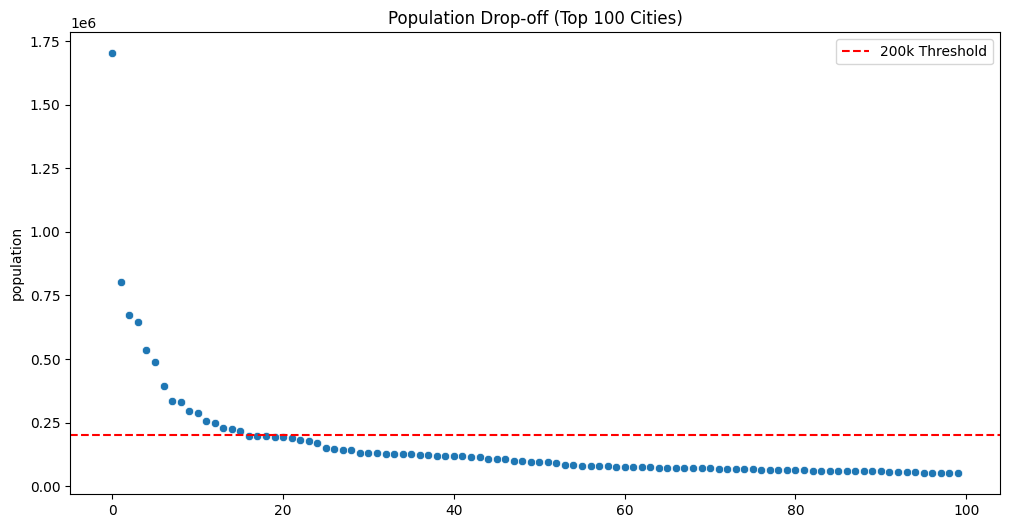


Selected 0 Metropolises:
[]


In [ ]:
# Sort by population
clean_df = clean_df.sort_values('population', ascending=False)

# Let's look at the top 20 cities
top_cities = clean_df.head(20)[['name', 'population']].reset_index(drop=True)
print(top_cities)

# Visualizing the "Long Tail"
plt.figure(figsize=(12, 6))
sns.scatterplot(data=clean_df.head(100), x=range(100), y='population')
plt.axhline(200000, color='r', linestyle='--', label='200k Threshold')
plt.title("Population Drop-off (Top 100 Cities)")
plt.legend()
plt.show()

# DECISION: Let's define Metropolises as population > 200,000 (or use the top 10 list)
metros = clean_df[clean_df['population'] > 200000].copy()
print(f"\nSelected {len(metros)} Metropolises:")
print(metros['name'].tolist())

In [33]:
# Constants from PDF
METRO_CITY_POPULATION_CONSTANT = -1/1443000
MIN_METRO_CITY_RADIUS = 10.0
MAX_METRO_CITY_RADIUS = 100.0 - MIN_METRO_CITY_RADIUS
METRO_CITY_POWER_CONSTANT = -1.4

def calculate_radius(population):
    """
    Returns the influence radius in KM based on population.
    """
    term = np.exp(METRO_CITY_POPULATION_CONSTANT * population)
    return MIN_METRO_CITY_RADIUS + MAX_METRO_CITY_RADIUS * (1 - term)

def calculate_impact(max_radius, distance_km):
    """
    Returns impact score (0 to 1).
    """
    if distance_km > max_radius:
        return 0.0
    return np.exp(METRO_CITY_POWER_CONSTANT * distance_km / max_radius)

# Apply to Metropolises to check range
metros['radius_km'] = metros['population'].apply(calculate_radius)

print("\nMetropolis Reach Check:")
print(metros[['name', 'population', 'radius_km']])


Metropolis Reach Check:
            name  population  radius_km
3193      Warsaw     1702139  72.333393
38637     Kraków      804237  48.454090
25290    Wrocław      672545  43.528532
36979       Łódź      645693  42.467847
32049     Poznań      536151  37.930380
43244     Gdańsk      487371  35.796275
27735   Szczecin      395513  31.576325
12876     Lublin      336339  28.712107
45804  Bydgoszcz      330038  28.400141
23010  Białystok      295683  26.675034
40302   Katowice      286960  26.230439
43235     Gdynia      257000  24.682803


In [23]:
clean_df['radius'] = clean_df['population'].apply(radius)

In [30]:
clean_df[clean_df['name'] == "Warsaw"]

,geonameid,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date,radius
3193,756135,Warsaw,Warsaw,"Barsobia,Varsa,Varsava,Varsavia,Varsavja,Varsa...",52.22977,21.01178,P,PPLC,PL,NaN,78.0,1465.0,146501.0,NaN,1702139,NaN,113,Europe/Warsaw,2025-07-22,72.333393


In [31]:
def _calcualate_metrocity_impact(max_radius, distance_to_metro_city):
    METRO_CITY_POWER_CONSTANT = -1.4
    impact = np.exp(METRO_CITY_POWER_CONSTANT  * distance_to_metro_city / max_radius)
    return impact